# PCA Demonstration in Python

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Iris.csv")
data.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 5)

In [4]:
y = data.pop("iris")
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: iris, Length: 150, dtype: object

In [5]:
data.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = data.copy()

In [10]:
x = scaler.fit_transform(X)

In [72]:
scaler.mean_

array([5.84333333, 3.054     , 3.75866667, 1.19866667])

In [73]:
scaler.var_

array([0.68112222, 0.18675067, 3.09242489, 0.57853156])

In [11]:
x[:5, :5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Applying PCA on the data

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()

In [14]:
?PCA

In [15]:
pca = PCA(random_state = 42)

In [16]:
# pca.fit() is used to perform PCA on the dataset
pca.fit(x)

PCA(random_state=42)

In [70]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [17]:
pca.components_ # Special Basis vectors or Eigen vectors

# The final PCs that you got were as follows:

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [18]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [19]:
import matplotlib.pyplot as plt

<BarContainer object of 4 artists>

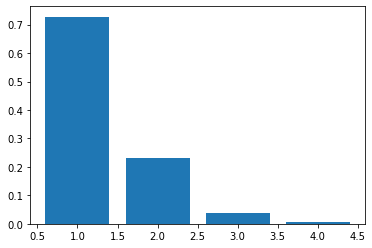

In [20]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [21]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

### Making the Scree plot

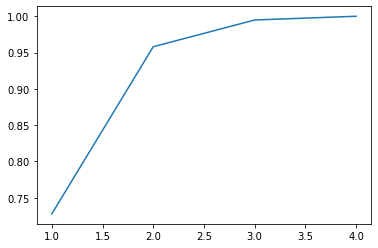

In [22]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

### PCA with two components

In [23]:
pc2 = PCA(n_components=2, random_state=42)

In [24]:
new_data = pc2.fit_transform(x)

In [25]:
new_data.shape

(150, 2)

### Making a dataframe out of it for convenience

In [41]:
df = pd.DataFrame(new_data, columns=["PC1","PC2"])
df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [42]:
df_final = pd.concat([df, y], axis=1)

In [43]:
df_final.head()

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [59]:
df_final["iris"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: iris, dtype: int64

### Pairplot this above DF

In [60]:
import seaborn as sns

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

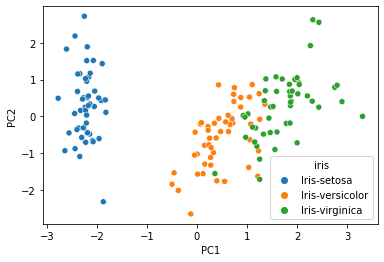

In [69]:
sns.scatterplot(data=df_final, x="PC1", y="PC2", hue="iris")